# Data preprocessing

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Load train dataset
flight_org = pd.read_excel("C:/Users/pbyim/OneDrive/바탕 화면/시온/Data/flight_train.xlsx")

# Use copied DataFrame to preserve original data
flight_df = flight_org.copy()
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- Found 1 missing value on 'Route' & 'Total_Stops' columns

In [12]:
flight_df['Total_Stops'].value_counts(dropna=False)

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
NaN            1
4 stops        1
Name: count, dtype: int64

In [14]:
# Fill missing value with mode
flight_df['Total_Stops']=flight_df['Total_Stops'].fillna('1 stop')

In [16]:
# Change "Date_of_Journey" Feature to Datetime form
flight_df['Date_of_Journey'] = flight_df.Date_of_Journey.apply(lambda x: pd.to_datetime(x, dayfirst=True))

flight_df['year'] = flight_df.Date_of_Journey.apply(lambda x: x.year)
flight_df['month'] = flight_df.Date_of_Journey.apply(lambda x: x.month)
flight_df['day'] = flight_df.Date_of_Journey.apply(lambda x: x.day)

flight_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,9


In [18]:
# Date_of_Jouney is now no need
# Route, Total_Stops are redundant
flight_df = flight_df.drop(['Date_of_Journey','Route'], axis=1)
print('Total Missing Value:', flight_df.isnull().sum().sum())
print('Shape:', flight_df.shape)

Total Missing Value: 0
Shape: (10683, 12)


- Extract **hour** and **minute** from 'Dep_Time' and 'Arrival_Time' column

In [21]:
flight_df['Dep_Time'] = flight_df['Dep_Time'].apply(lambda x: pd.to_datetime(x))
flight_df['Arrival_Time'] = flight_df['Arrival_Time'].apply(lambda x: pd.to_datetime(x))

flight_df['Dep_hour'] = flight_df['Dep_Time'].apply(lambda x: x.hour)
flight_df['Dep_min'] = flight_df['Dep_Time'].apply(lambda x: x.minute)
flight_df['Arrival_hour'] = flight_df['Arrival_Time'].apply(lambda x: x.hour)
flight_df['Arrival_min'] = flight_df['Arrival_Time'].apply(lambda x: x.minute)

In [23]:
flight_df = flight_df.drop(['Dep_Time', 'Arrival_Time'], axis=1)
flight_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,2019,6,9,9,25,4,25


- The r before the string indicates Raw String, which allows backslashes ( \ ) to be recognized literally without treating them as special escape characters.
- The part in square brackets () indicates a capture group, which is used to extract specific parts of the regular expression separately.
- In this case, (\d+) captures more than one number. So, taken as a whole, r'(\d+)h' → “a pattern of one or more numbers (e.g., 19, 2, 123, etc.) followed by the letter ‘h’”.

In [25]:
flight_df['Duration_hour'] = flight_df['Duration'].str.extract(r'(\d+)h')
flight_df['Duration_minute'] = flight_df['Duration'].str.extract(r'(\d+)m')

flight_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,2019,6,9,9,25,4,25,19,NaN


In [27]:
# Since if the duration hour or minute is 0, str.extract return NaN, convert them to 0
flight_df['Duration_hour'] = flight_df['Duration_hour'].fillna(0)
flight_df['Duration_minute'] = flight_df['Duration_minute'].fillna(0)

# Conver type to integer
flight_df['Duration_hour'] = flight_df['Duration_hour'].astype(int)
flight_df['Duration_minute'] = flight_df['Duration_minute'].astype(int)

flight_df['Duration'] = flight_df['Duration_hour'] + flight_df['Duration_minute']/60

flight_df = flight_df.drop(['Duration_hour', 'Duration_minute'], axis=1)
flight_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2.833333,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7.416667,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19.000000,2 stops,No info,13882,2019,6,9,9,25,4,25


- Check the distribution of Target

C:\Users\pbyim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


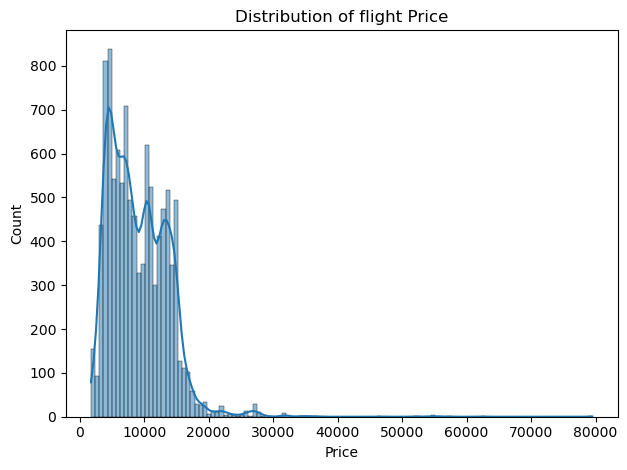

In [30]:
plt.title('Distribution of flight Price')
sns.histplot(flight_df['Price'], kde=True)
plt.tight_layout()
plt.show()

- Since the data is skewed, perform **log-transformation**

C:\Users\pbyim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


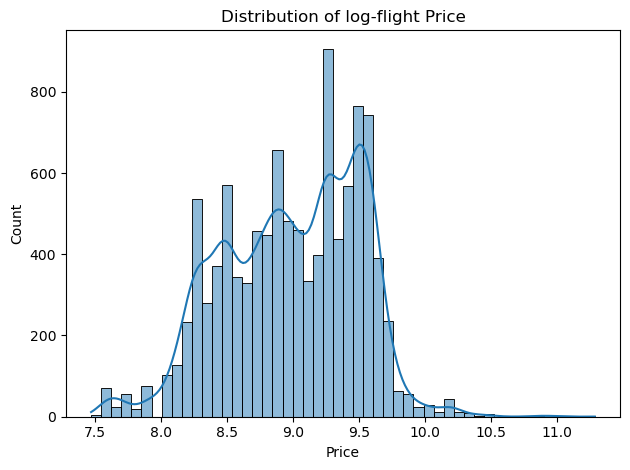

In [33]:
plt.title('Distribution of log-flight Price')
log_price = np.log1p(flight_df['Price'])
sns.histplot(log_price, kde=True)
plt.tight_layout()
plt.show()

- The data got less skewed so perform it to our data

In [36]:
flight_df['Price'] = np.log1p(flight_df['Price'])

- Check components of remaning object type columns

In [39]:
# Check components of Airline
flight_df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [41]:
# Check components of Source
flight_df.Source.value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [43]:
# Check components of Destination
flight_df.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [45]:
# Check components of Additional_Info
flight_df.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

- Visualize relation of target(Price) and some features

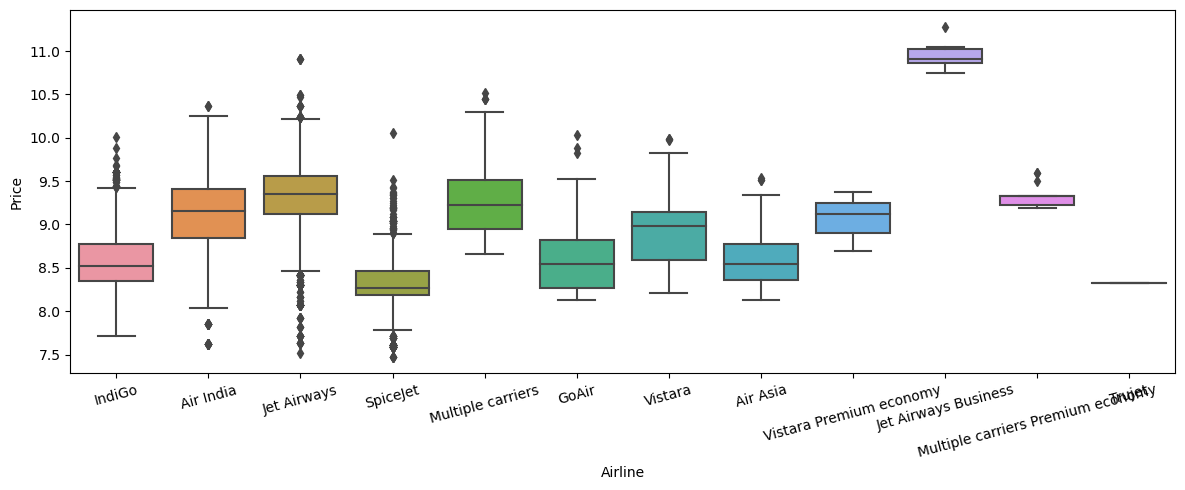

In [48]:
plt.figure(figsize=(12,5))
sns.boxplot(x=flight_df['Airline'], y=flight_df['Price'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

- Most Airlines have similar price distribution except for **'Jet Airways Buisiness'** has especially higher price

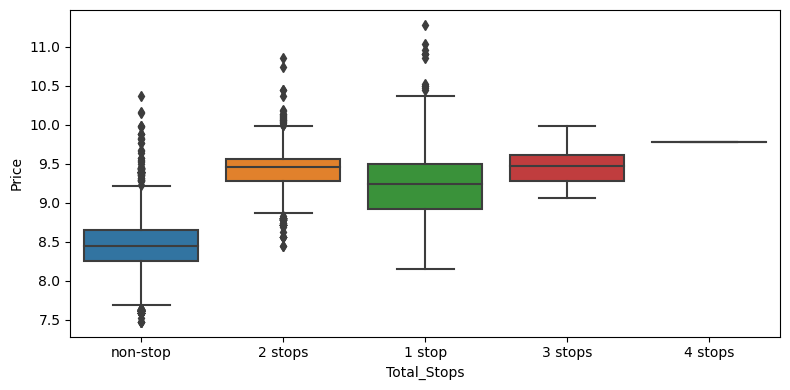

In [51]:
plt.figure(figsize=(8,4))
sns.boxplot(x=flight_df['Total_Stops'], y=flight_df['Price'])
plt.tight_layout()
plt.show()

- non-stop has slightly lower price distribution while others are similar

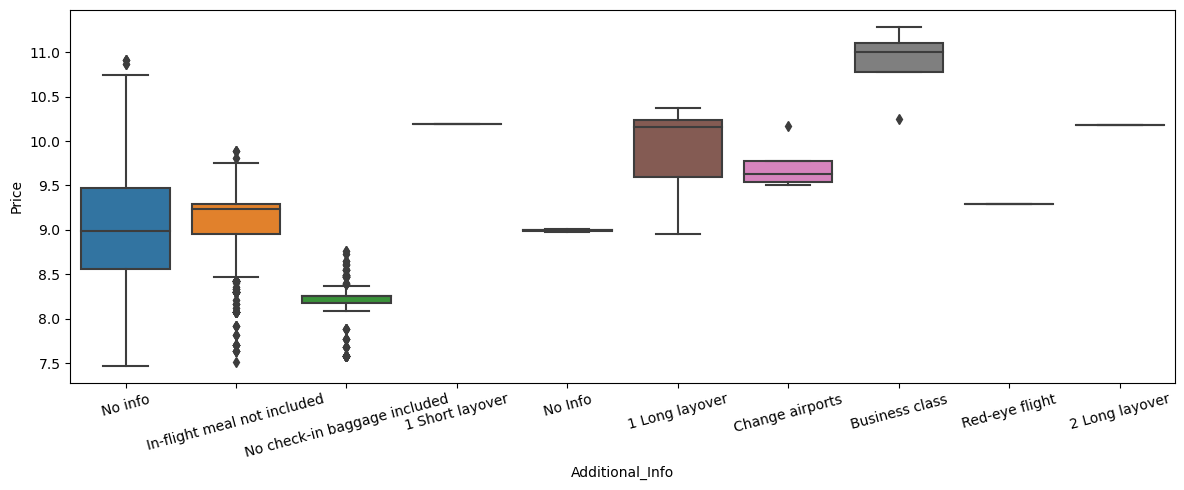

In [54]:
plt.figure(figsize=(12,5))
sns.boxplot(x=flight_df['Additional_Info'], y=flight_df['Price'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

- Most of the data are 'No info' or 'In-flight meal not included', so I will just drop the column

In [57]:
flight_df = flight_df.drop('Additional_Info', axis=1)

- Define process till now as a function for later convinience

In [64]:
def process_flight_data(flight_df):
    flight_df['Total_Stops']=flight_df['Total_Stops'].fillna('1 stop')
    
    flight_df['Date_of_Journey'] = flight_df.Date_of_Journey.apply(lambda x: pd.to_datetime(x, dayfirst=True))
    flight_df['year'] = flight_df.Date_of_Journey.apply(lambda x: x.year)
    flight_df['month'] = flight_df.Date_of_Journey.apply(lambda x: x.month)
    flight_df['day'] = flight_df.Date_of_Journey.apply(lambda x: x.day)

    flight_df['Dep_Time'] = flight_df['Dep_Time'].apply(lambda x: pd.to_datetime(x))
    flight_df['Arrival_Time'] = flight_df['Arrival_Time'].apply(lambda x: pd.to_datetime(x))
    flight_df['Dep_hour'] = flight_df['Dep_Time'].apply(lambda x: x.hour)
    flight_df['Dep_min'] = flight_df['Dep_Time'].apply(lambda x: x.minute)
    flight_df['Arrival_hour'] = flight_df['Arrival_Time'].apply(lambda x: x.hour)
    flight_df['Arrival_min'] = flight_df['Arrival_Time'].apply(lambda x: x.minute)

    flight_df['Duration_hour'] = flight_df['Duration'].str.extract(r'(\d+)h')
    flight_df['Duration_minute'] = flight_df['Duration'].str.extract(r'(\d+)m')
    flight_df['Duration_hour'] = flight_df['Duration_hour'].fillna(0)
    flight_df['Duration_minute'] = flight_df['Duration_minute'].fillna(0)
    flight_df['Duration_hour'] = flight_df['Duration_hour'].astype(int)
    flight_df['Duration_minute'] = flight_df['Duration_minute'].astype(int)
    flight_df['Duration'] = flight_df['Duration_hour'] + flight_df['Duration_minute']/60

    flight_df['Price'] = np.log1p(flight_df['Price'])

    flight_df = flight_df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 
                                'Duration_hour', 'Duration_minute', 'Additional_Info'], axis=1)
    return flight_df

In [142]:
# Check if the preprocessing function working well
flight_df = process_flight_data(flight_org.copy())
flight_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2.833333,non-stop,8.268219,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7.416667,2 stops,8.944159,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19.000000,2 stops,9.538420,2019,6,9,9,25,4,25


- Perform onehot encoding for categorical features

In [144]:
flight_df_encoded = pd.get_dummies(flight_df, drop_first=True)
flight_df_encoded.shape

(10683, 33)

# Linear Model Learning, Prediction, and Evaluation

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [79]:
def get_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(model.__class__.__name__, 'RMSE:', np.round(rmse,4))
    return np.round(rmse,4)

def get_model_rmses(models, X_test, y_test):
    rmses = []
    for model in models:
        rmse = get_rmse(model, X_test, y_test)
        rmses.append(rmse)
    return rmses

In [82]:
X = flight_df_encoded.drop('Price', axis=1)
y = flight_df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [84]:
lr_reg = LinearRegression()
ridge = Ridge(max_iter=10000)
lasso = Lasso(max_iter=10000)

lr_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

linear_models = [lr_reg, ridge, lasso]
get_model_rmses(linear_models, X_test, y_test)

LinearRegression RMSE: 0.2721
Ridge RMSE: 0.2723
Lasso RMSE: 0.4313


[0.2721, 0.2723, 0.4313]

- Actually, Since our Target value 'Price' is in log-scale, the rmse here is rmsle
- Lasso model's performance seems a little poorer
- Visualize regression coefficients before hyper parameter tuning
- Since there are 33 features after One-Hot encoding, we will visualize top, bottom 10 features

In [87]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index = X.columns)
    coef_top = coef.sort_values(ascending=False).head(n)
    coef_bottom = coef.sort_values(ascending=False).tail(n)
    return coef_top, coef_bottom

def visualize_coef(models, n=10):
    fig, axes = plt.subplots(figsize=(24,10), nrows=1, ncols=len(models))
    for i, model in enumerate(models):
        coef_top, coef_bottom = get_top_bottom_coef(model, n)
        coef = pd.concat([coef_top, coef_bottom])
        
        axes[i].set_title('Model:'+ model.__class__.__name__)
        axes[i].tick_params(axis='y', direction='in', pad=-120)
        sns.barplot(x=coef.values, y=coef.index, ax=axes[i])

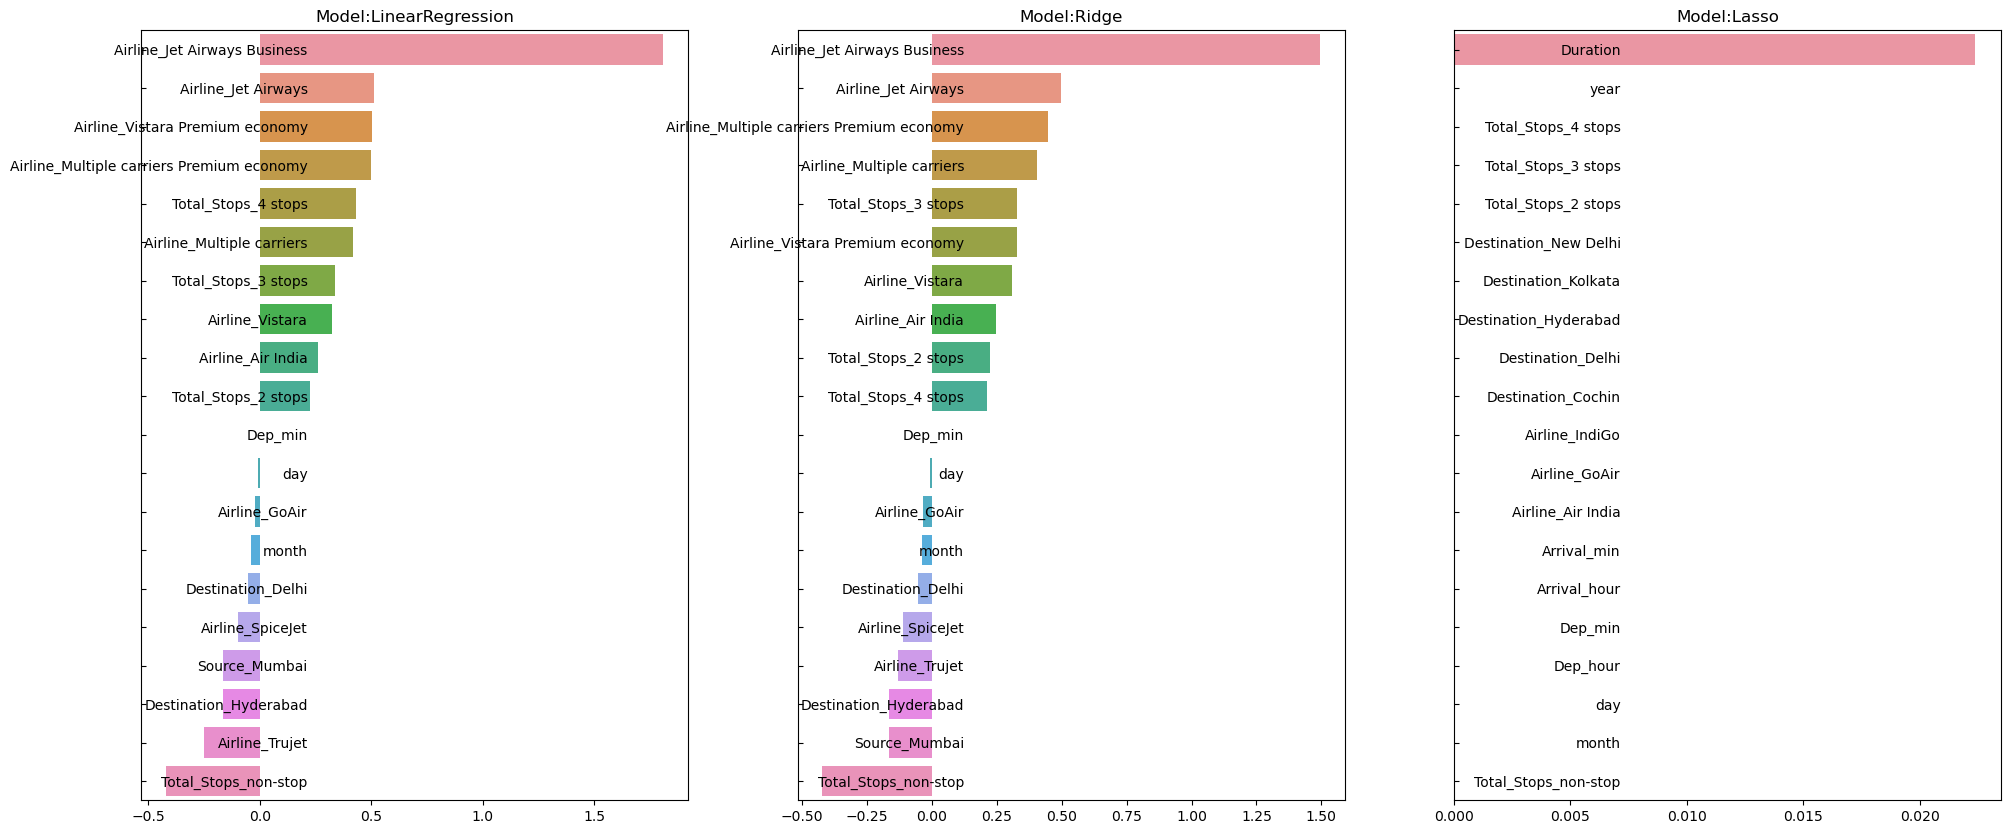

In [89]:
visualize_coef(linear_models)

- Distributions of regression coefficients of Lasso model are significantly different
- Lasso model made all regression coefficients to 0 except for duration
- Check if there is data splitting problem by cross_val_score

In [92]:
from sklearn.model_selection import cross_val_score

In [94]:
def get_cv_rmses(models):
    for model in models:
        rmse_list = -cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
        rmse_avg = np.mean(rmse_list)
        print(f'Model: {model.__class__.__name__}')
        print(f'RMSE for each fold: {np.round(rmse_list, 3)}')
        print(f'Average RMSE {np.round(rmse_avg, 3)} \n')

In [96]:
get_cv_rmses(linear_models)

Model: LinearRegression
RMSE for each fold: [0.271 0.256 0.269 0.273 0.262]
Average RMSE 0.266 

Model: Ridge
RMSE for each fold: [0.271 0.257 0.269 0.273 0.263]
Average RMSE 0.266 

Model: Lasso
RMSE for each fold: [0.434 0.427 0.431 0.424 0.43 ]
Average RMSE 0.429 



- Even with cross-validation, Lasso's RMSE is still higher than Ridge and the previous LinearRegression model
- So now we can make one last attempt at hyper-parameter tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [101]:
def get_best_params(model, param_grid):
    grid_model = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5)
    grid_model.fit(X, y)
    rmse = -1*grid_model.best_score_
    print(f'Model: {model.__class__.__name__}')
    print(f'RMSE: {rmse} Best parameter: {grid_model.best_params_} \n')

In [103]:
ridge_params={'alpha':[0.05, 0.1, 1, 5, 10, 20, 50]}
lasso_params={'alpha':[0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

get_best_params(ridge, ridge_params)
get_best_params(lasso, lasso_params)

Model: Ridge
RMSE: 0.26628760385715095 Best parameter: {'alpha': 0.05} 

Model: Lasso
RMSE: 0.2892382805111945 Best parameter: {'alpha': 0.01} 



In [105]:
# Narrow the parameter range and re-test
ridge_params={'alpha':[0.05, 0.1, 0.15, 0.2, 0.3]}
lasso_params={'alpha':[0.001, 0.005, 0.01, 0.05, 0.1]}

get_best_params(ridge, ridge_params)
get_best_params(lasso, lasso_params)

Model: Ridge
RMSE: 0.26628760385715095 Best parameter: {'alpha': 0.05} 

Model: Lasso
RMSE: 0.2711087544119052 Best parameter: {'alpha': 0.001} 



- Based on these alpha, fit/predict models again

In [108]:
lr_reg = LinearRegression()
ridge = Ridge(alpha=0.05, max_iter=10000)
lasso = Lasso(alpha=0.001, max_iter=10000)

lr_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

linear_models = [lr_reg, ridge, lasso]
get_model_rmses(linear_models, X_test, y_test)

LinearRegression RMSE: 0.2721
Ridge RMSE: 0.2721
Lasso RMSE: 0.2766


[0.2721, 0.2721, 0.2766]

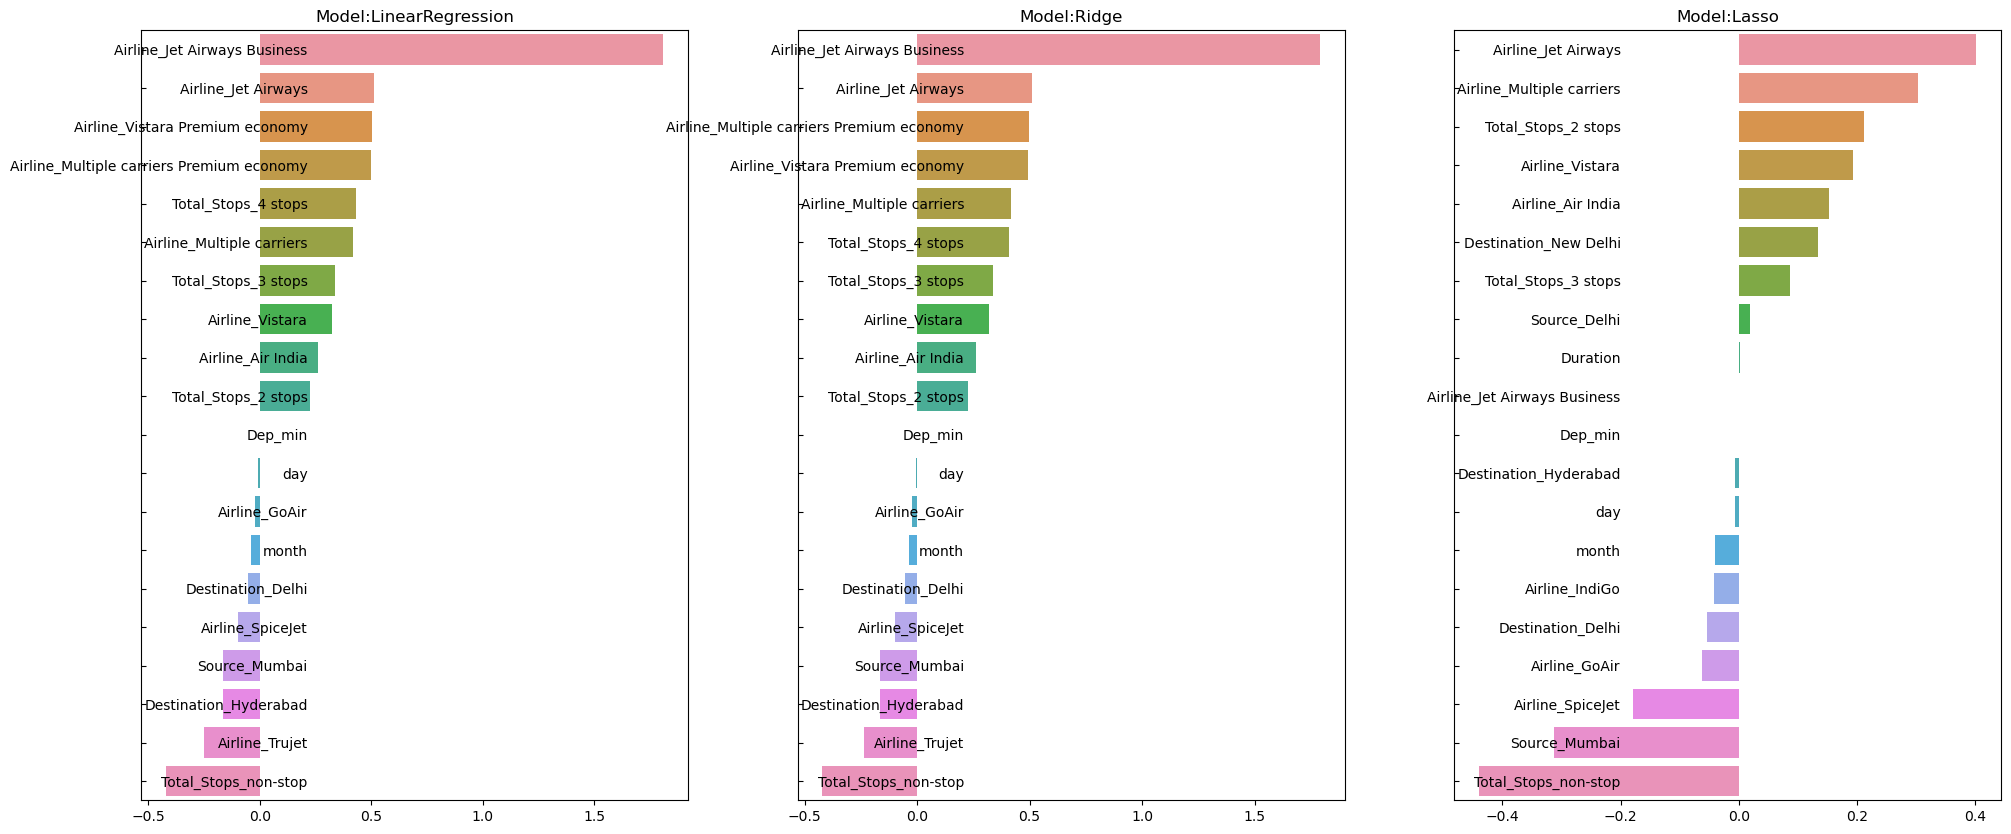

In [110]:
visualize_coef(linear_models)

- The model performances got better, distributions of coefficients got quite simililar

# Additional Data processing
- Since we only checked the distribution of Target, here we check the skewness of features
- Note that we have to use data **before** one-hot encoding

In [114]:
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore", message="Precision loss occurred in moment calculation due to catastrophic cancellation")

In [116]:
# Extract numerical features
num_features = flight_df.columns[flight_df.dtypes != 'object']

skewness = flight_df[num_features].apply(lambda x: skew(x))
# Consider skewness > 1 as skewed
skewed_features = skewness[skewness > 1]
print(skewed_features.sort_values(ascending=False))

Series([], dtype: float64)


- No features are skewed
- lastly check outliers, since checking all features takes too long, I will only check price vs duration, Jet Airways, non-stop

In [146]:
warnings.filterwarnings("ignore", category=FutureWarning)

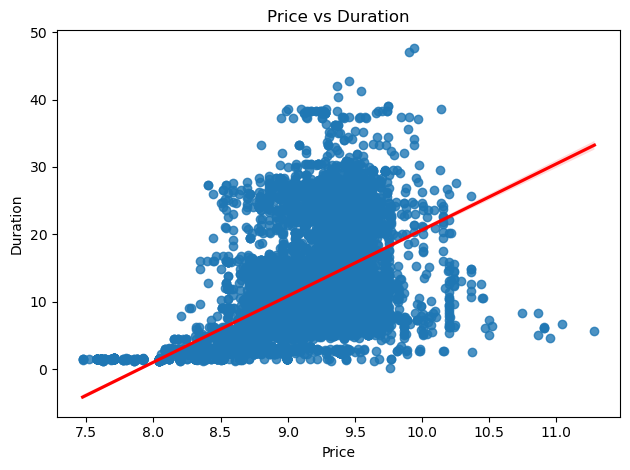

In [148]:
plt.title('Price vs Duration')
sns.regplot(x=flight_df['Price'], y=flight_df['Duration'], line_kws={'color':'red'}, )
plt.tight_layout()
plt.show()

- Price tend to increase as duration increases while there seems some are not following the pattern
- Consider them as outliers

In [151]:
cond1 = flight_df['Price'] > 10.5

cond2 = flight_df['Duration'] < 10

outlier_idx = flight_df[cond1 & cond2].index

print(f'Outlier Index: {outlier_idx}')
print(f'Shape before remove outlier: {flight_df.shape}')
flight_df.drop(outlier_idx, axis=0, inplace=True)
print(f'Shape after remove outlier: {flight_df.shape}')

Outlier Index: Index([396, 657, 1478, 2618, 2924, 5372, 5439, 7351, 9715, 10364], dtype='int64')
Shape before remove outlier: (10683, 13)
Shape after remove outlier: (10673, 13)


In [153]:
def get_outlier_idx(df, column, key, weight=1.5):
    column_price = df[df[column]==key]['Price']
    quantile25 = np.percentile(column_price.values, 25)
    quantile75 = np.percentile(column_price.values, 75)

    iqr = weight * (quantile75-quantile25)
    lower_bound = quantile25-iqr
    upper_bound = quantile75+iqr

    outlier_idx = column_price[(column_price<lower_bound) | (column_price>upper_bound)].index
    return outlier_idx

In [155]:
Jet_Airways_outlier_idx = get_outlier_idx(flight_df, 'Airline', 'Jet Airways')
non_stop_outlier_idx = get_outlier_idx(flight_df, 'Total_Stops', 'non-stop')
print(f'Jet Airways outlier indices: {Jet_Airways_outlier_idx}')
print(f'non-stop outlier indices: {non_stop_outlier_idx}\n')

combined_outlier_idx = Jet_Airways_outlier_idx.union(non_stop_outlier_idx)
print(f'Combined outlier indices: {combined_outlier_idx}')

Jet Airways outlier indices: Index([  138,   282,   350,   569,   690,   731,   744,   777,   828,   946,
       ...
       10373, 10415, 10439, 10442, 10463, 10496, 10586, 10597, 10611, 10647],
      dtype='int64', length=175)
non-stop outlier indices: Index([  228,   248,   268,   387,   398,   426,   655,   690,   711,   733,
       ...
       10032, 10052, 10358, 10388, 10418, 10433, 10493, 10513, 10541, 10681],
      dtype='int64', length=165)

Combined outlier indices: Index([  138,   228,   248,   268,   282,   350,   387,   398,   426,   569,
       ...
       10463, 10493, 10496, 10513, 10541, 10586, 10597, 10611, 10647, 10681],
      dtype='int64', length=333)


In [157]:
flight_df = flight_df.drop(combined_outlier_idx, axis=0)
flight_df.shape

(10340, 13)

In [159]:
flight_df_encoded = pd.get_dummies(flight_df, drop_first=True)
flight_df_encoded.shape

(10340, 32)

In [161]:
X = flight_df_encoded.drop('Price', axis=1)
y = flight_df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [163]:
lr_reg = LinearRegression()
ridge = Ridge(alpha=0.05, max_iter=10000)
lasso = Lasso(alpha=0.001, max_iter=10000)

lr_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

linear_models = [lr_reg, ridge, lasso]
get_model_rmses(linear_models, X_test, y_test)

LinearRegression RMSE: 0.2432
Ridge RMSE: 0.2432
Lasso RMSE: 0.2445


[0.2432, 0.2432, 0.2445]

- Performance fo the model got better after eliminating outliers

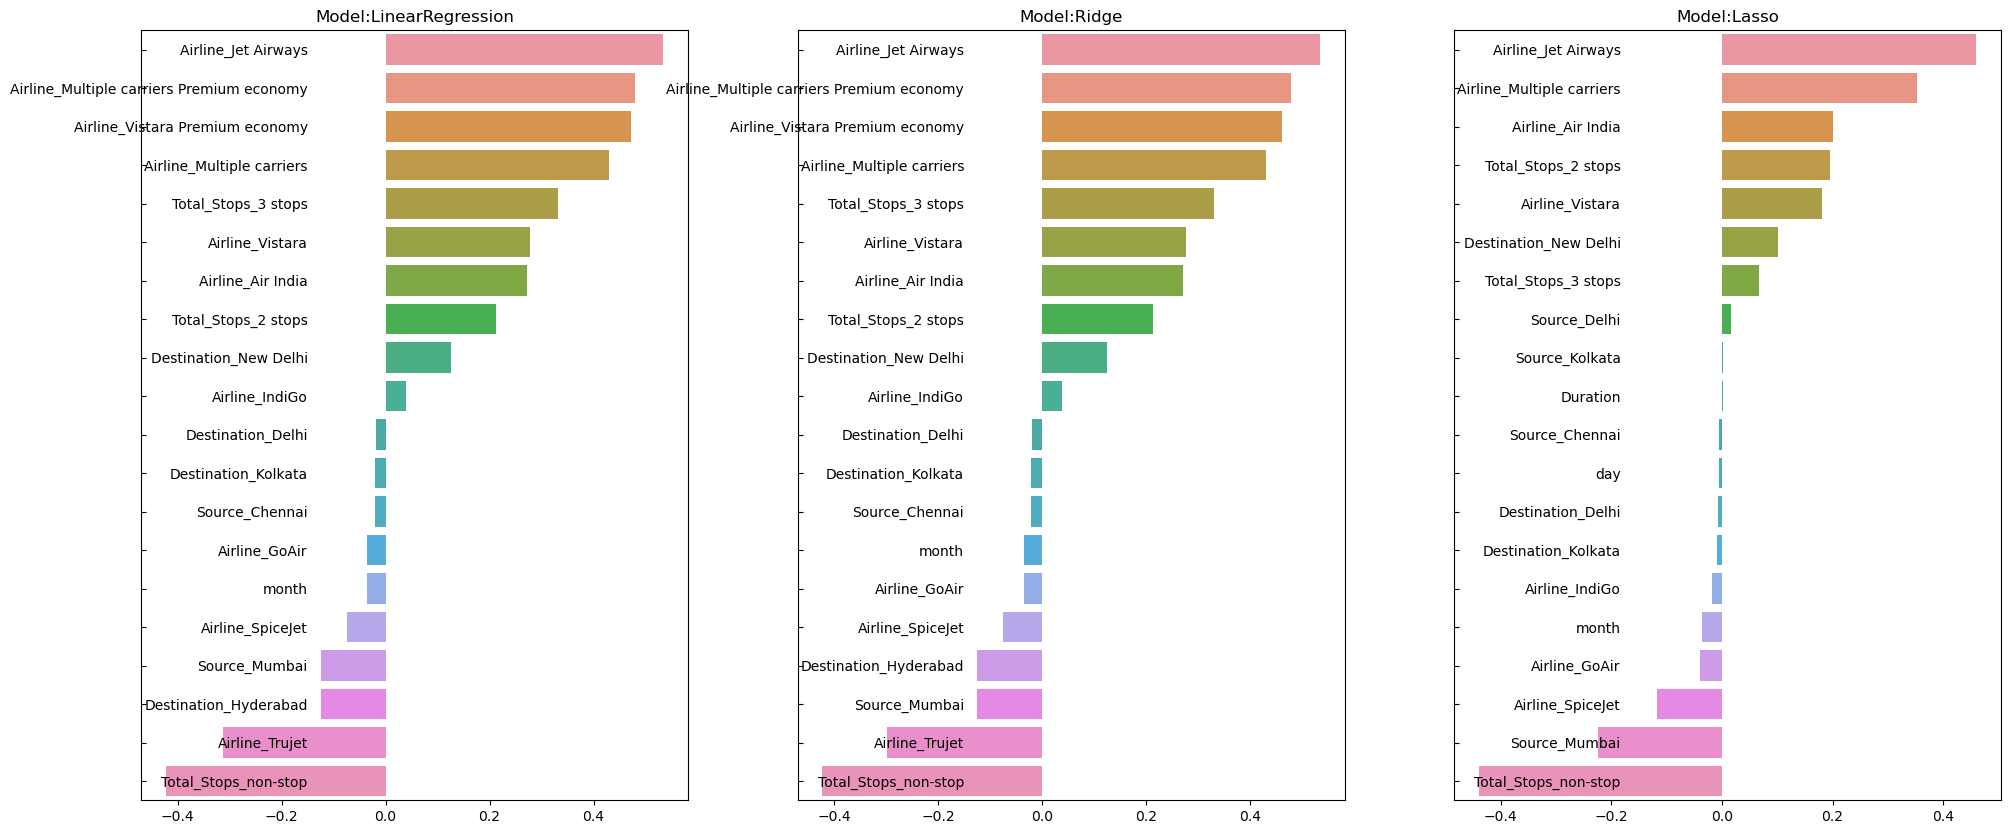

In [166]:
visualize_coef(linear_models)

# Tree Model Learning, Prediction, and Evaluation

In [169]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [171]:
xgb_reg = XGBRegressor(n_estimators = 1000)
lgbm_reg = LGBMRegressor(n_estimators = 1000, verbosity=-1)

tree_models = [xgb_reg, lgbm_reg]

get_cv_rmses(tree_models)

Model: XGBRegressor
RMSE for each fold: [0.177 0.177 0.17  0.182 0.181]
Average RMSE 0.177 

Model: LGBMRegressor
RMSE for each fold: [0.154 0.154 0.15  0.159 0.155]
Average RMSE 0.154 



- It seems tree models perform better than linear models
- Use hyperopt to do hyper parameter tuning

In [173]:
from hyperopt import hp, fmin, Trials, tpe, STATUS_OK

In [175]:
xgb_search_space = {'max_depth':hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight':hp.quniform('min_child_weight', 1, 4, 1), 
                    'learning_rate':hp.uniform('learning_rate', 0.05, 1), 
                    'colsample_bytree':hp.uniform('colsample_bytree', 0.1,0.8)}

In [177]:
def xgb_obj_func(search_space):
    xgb_reg = XGBRegressor(n_estimators=1000, max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          learning_rate=search_space['learning_rate'],
                          colsample_bytree=search_space['colsample_bytree'])
    rmse = -1*cross_val_score(xgb_reg, X, y, scoring='neg_root_mean_squared_error', cv=5)

    return {'loss':np.mean(rmse), 'status': STATUS_OK}

In [179]:
trial_vals = Trials()

xgb_best = fmin(fn=xgb_obj_func, space=xgb_search_space, algo=tpe.suggest, max_evals=50, trials=trial_vals)
print(f'Best: {xgb_best}')

100%|███████████████████████████████████████████████| 50/50 [04:17<00:00,  5.16s/trial, best loss: 0.14764092653406516]
Best: {'colsample_bytree': 0.4975179649216651, 'learning_rate': 0.09521232946351188, 'max_depth': 5.0, 'min_child_weight': 2.0}


In [181]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves',50,70,1),
                  'max_depth':hp.quniform('max_depth',90,120,1),
                  'min_child_samples':hp.quniform('min_child_samples',70,90,1),
                  'subsample':hp.uniform('subsample',0.6,0.9),
                  'learning_rate':hp.uniform('learning_rate',0.01,0.1)}

In [183]:
def lgbm_obj_func(search_space):
    lgbm_reg=LGBMRegressor(n_estimators=1000, 
                            num_leaves=int(search_space['num_leaves']),
                            max_depth=int(search_space['max_depth']),
                            min_child_samples=int(search_space['min_child_samples']),
                            subsample=search_space['subsample'], 
                            learning_rate=search_space['learning_rate'], verbosity=-1)
    
    rmse = -1*cross_val_score(lgbm_reg, X, y, scoring='neg_root_mean_squared_error', cv=5)

    return {'loss':np.mean(rmse), 'status': STATUS_OK}

In [185]:
trial_vals = Trials()

lgbm_best = fmin(fn=lgbm_obj_func, space=lgbm_search_space, algo=tpe.suggest, max_evals=50, trials=trial_vals)
print(f'Best: {lgbm_best}')

100%|███████████████████████████████████████████████| 50/50 [03:59<00:00,  4.79s/trial, best loss: 0.15224949242972854]
Best: {'learning_rate': 0.029309023022965508, 'max_depth': 99.0, 'min_child_samples': 72.0, 'num_leaves': 53.0, 'subsample': 0.6187432915705998}


- Use above hyperparameters to fit the models

In [187]:
xgb_reg = XGBRegressor(n_estimators = 1000, max_depth=int(xgb_best['max_depth']), 
                       min_child_weight=int(xgb_best['min_child_weight']),
                       learning_rate=xgb_best['learning_rate'],
                       colsample_bytree=xgb_best['colsample_bytree'])

In [189]:
lgbm_reg=LGBMRegressor(n_estimators=1000, 
                    num_leaves=int(lgbm_best['num_leaves']),
                    max_depth=int(lgbm_best['max_depth']),
                    min_child_samples=int(lgbm_best['min_child_samples']),
                    subsample=lgbm_best['subsample'],
                    learning_rate=lgbm_best['learning_rate'], n_jobs=-1)

In [191]:
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

tree_models = [xgb_reg, lgbm_reg]
get_model_rmses(tree_models, X_test, y_test)

XGBRegressor RMSE: 0.1406
LGBMRegressor RMSE: 0.1467


[0.1406, 0.1467]

In [266]:
# Extra: check non-log-scale RMSE
y_log_pred = lgbm_reg.predict(X_test)
y_pred = np.expm1(y_log_pred)
y_test_exp = np.expm1(y_test)

rmse = root_mean_squared_error(y_test_exp, y_pred)
rmsle = root_mean_squared_error(y_test, y_log_pred)

print(f'RMSE:{np.round(rmse,4)} RMSLE:{np.round(rmsle,4)}')
price_min = min(np.expm1(flight_df['Price']))
price_max = max(np.expm1(flight_df['Price']))
print(f'Range of Price: {price_min} ~ {price_max}')

RMSE:1545.4424 RMSLE:0.1467
Range of Price: 2174.9999999999995 ~ 34608.00000000002


- RMSLE is the got better and are the lowest till now
- Consider the 'Price' column is range from about 2174-34608, our RMSE is reasonably small enough.

In [194]:
def visualize_tree_coef(models):
    fig, axes = plt.subplots(figsize=(24,10), nrows=1, ncols=len(models))
    fig.tight_layout()
    for i, model in enumerate(models):
        ftr_imp_val = model.feature_importances_
        ftr_imp = pd.Series(ftr_imp_val, X.columns).sort_values(ascending=False)[:20]
        
        axes[i].set_title('Model: ' + model.__class__.__name__, size=25)
        axes[i].tick_params(axis='y', direction='in', pad=-120)
        sns.barplot(x=ftr_imp.values, y=ftr_imp.index, ax=axes[i])

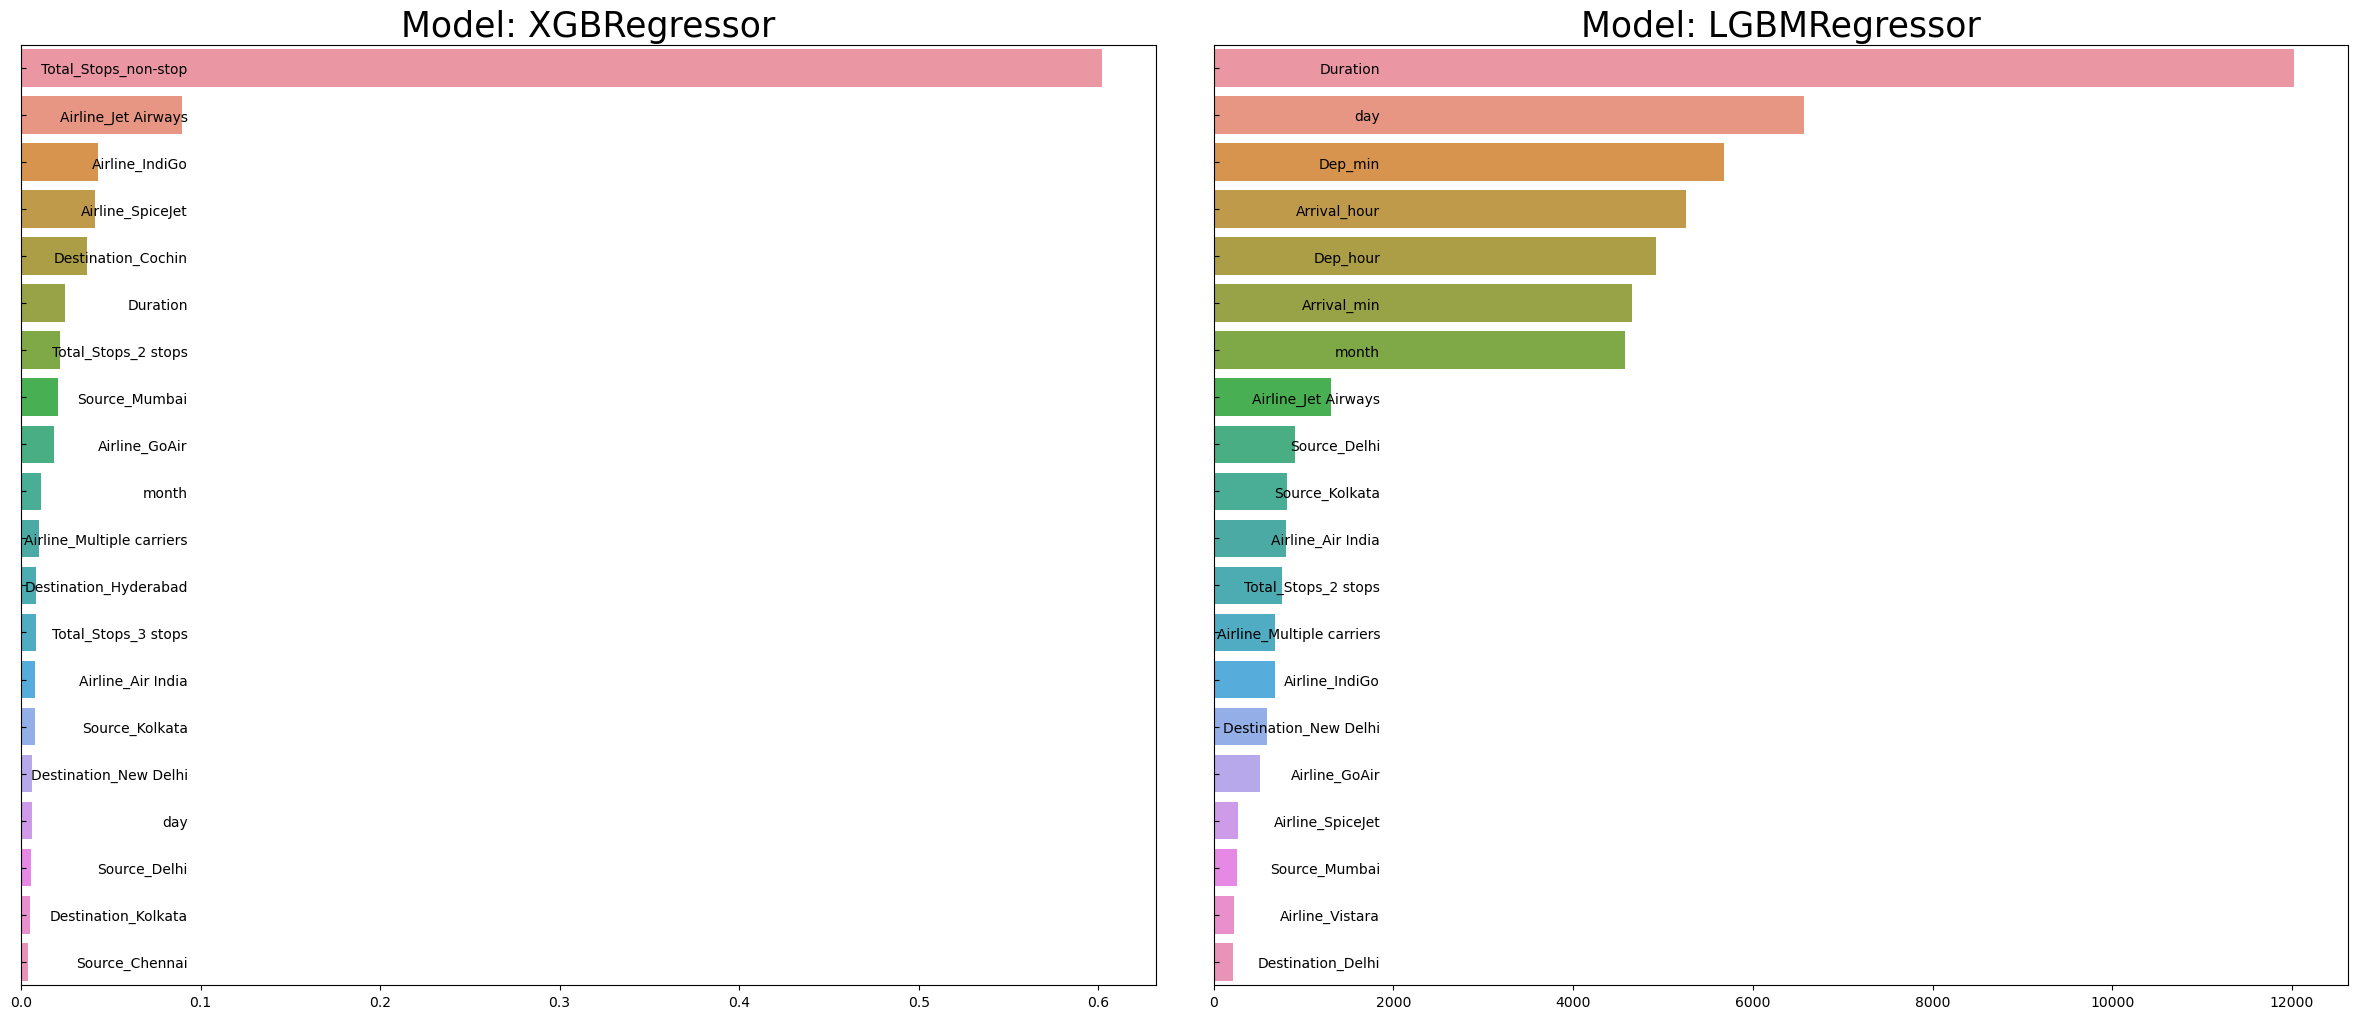

In [196]:
visualize_tree_coef(tree_models)

# Use test data to test out final model
- I will use LGBM model
- Because even though XGBM performed slightly better, but LGBM is faster and the performance gap isn't big.

In [235]:
# Load test dataset
flight_test = pd.read_excel("C:/Users/pbyim/OneDrive/바탕 화면/시온/Data/flight_test.xlsx")

flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


- Have to do the same data cleaning process as same as the train data
- Revise previously defined function

In [238]:
def process_flight_test_data(flight_df):
    flight_df['Total_Stops']=flight_df['Total_Stops'].fillna('1 stop')
    
    flight_df['Date_of_Journey'] = flight_df.Date_of_Journey.apply(lambda x: pd.to_datetime(x, dayfirst=True))
    flight_df['year'] = flight_df.Date_of_Journey.apply(lambda x: x.year)
    flight_df['month'] = flight_df.Date_of_Journey.apply(lambda x: x.month)
    flight_df['day'] = flight_df.Date_of_Journey.apply(lambda x: x.day)

    flight_df['Dep_Time'] = flight_df['Dep_Time'].apply(lambda x: pd.to_datetime(x))
    flight_df['Arrival_Time'] = flight_df['Arrival_Time'].apply(lambda x: pd.to_datetime(x))
    flight_df['Dep_hour'] = flight_df['Dep_Time'].apply(lambda x: x.hour)
    flight_df['Dep_min'] = flight_df['Dep_Time'].apply(lambda x: x.minute)
    flight_df['Arrival_hour'] = flight_df['Arrival_Time'].apply(lambda x: x.hour)
    flight_df['Arrival_min'] = flight_df['Arrival_Time'].apply(lambda x: x.minute)

    flight_df['Duration_hour'] = flight_df['Duration'].str.extract(r'(\d+)h')
    flight_df['Duration_minute'] = flight_df['Duration'].str.extract(r'(\d+)m')
    flight_df['Duration_hour'] = flight_df['Duration_hour'].fillna(0)
    flight_df['Duration_minute'] = flight_df['Duration_minute'].fillna(0)
    flight_df['Duration_hour'] = flight_df['Duration_hour'].astype(int)
    flight_df['Duration_minute'] = flight_df['Duration_minute'].astype(int)
    flight_df['Duration'] = flight_df['Duration_hour'] + flight_df['Duration_minute']/60

    flight_df = flight_df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 
                                'Duration_hour', 'Duration_minute', 'Additional_Info'], axis=1)
    return flight_df

In [240]:
flight_test_df = process_flight_test_data(flight_test.copy())
flight_test_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,10.916667,1 stop,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,4.000000,1 stop,2019,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,23.750000,1 stop,2019,5,21,19,15,19,0


In [241]:
flight_test_encoded = pd.get_dummies(flight_test_df, drop_first=True)
flight_test_encoded.shape

(2671, 31)

In [244]:
y_pred = lgbm_reg.predict(flight_test_encoded)

In [252]:
flight_test_df['Price'] = np.expm1(y_pred)
flight_test_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
0,Jet Airways,Delhi,Cochin,10.916667,1 stop,2019,6,6,17,30,4,25,11155.669714
1,IndiGo,Kolkata,Banglore,4.000000,1 stop,2019,5,12,6,20,10,20,4388.876129
2,Jet Airways,Delhi,Cochin,23.750000,1 stop,2019,5,21,19,15,19,0,13966.997217


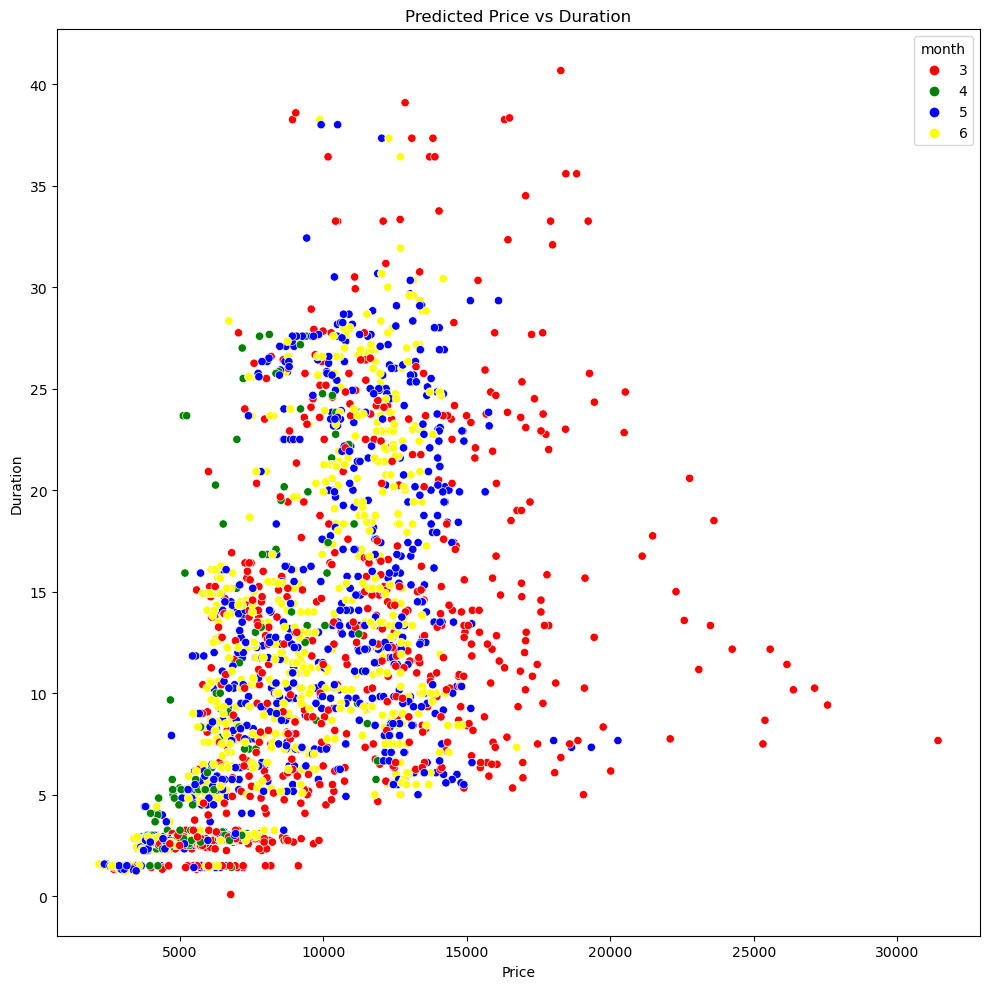

In [254]:
plt.figure(figsize=(10,10))
plt.title('Predicted Price vs Duration')
sns.scatterplot(x=flight_test_df['Price'], y=flight_test_df['Duration'], 
                hue=flight_test_df['month'], palette=["red", "green", "blue",'yellow'])
plt.tight_layout()
plt.show()